In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

os.environ['QT_AUTO_SCREEN_SCALE_FACTOR'] = '1'
os.environ['QT_SCREEN_SCALE_FACTORS'] = '1'
os.environ['QT_SCALE_FACTOR'] = '1'

In [27]:
# Read the CSV file into a DataFrame
df = pd.read_csv('DataSet/combined_weather_and_air_quality_data.csv', parse_dates=['Time'], low_memory=True)

In [28]:
# Define data for lockdown periods and non-lockdown period
lockdown_1 = df[(df['Time'] >= '2020-03-24') & (df['Time'] <= '2020-07-21')]
lockdown_2 = df[(df['Time'] >= '2021-04-29') & (df['Time'] <= '2021-07-22')]
non_lockdown = df[~((df['Time'] >= '2020-03-24') & (df['Time'] <= '2020-07-21')) &
                   ~((df['Time'] >= '2021-04-29') & (df['Time'] <= '2021-07-22'))]


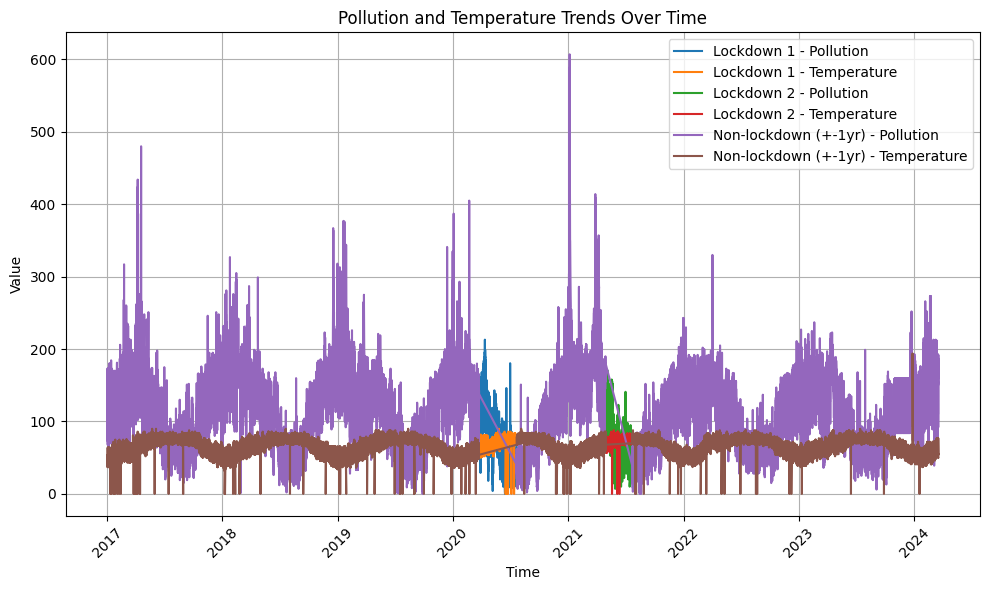

In [29]:
# Plotting pollution and temperature trends over time
plt.figure(figsize=(10, 6))

# Lockdown 1
plt.plot(lockdown_1['Time'], lockdown_1['PM2.5 - AQI (UG/M3)'], label='Lockdown 1 - Pollution')
plt.plot(lockdown_1['Time'], lockdown_1['Temperature'], label='Lockdown 1 - Temperature')

# Lockdown 2
plt.plot(lockdown_2['Time'], lockdown_2['PM2.5 - AQI (UG/M3)'], label='Lockdown 2 - Pollution')
plt.plot(lockdown_2['Time'], lockdown_2['Temperature'], label='Lockdown 2 - Temperature')

# Non-lockdown
plt.plot(non_lockdown['Time'], non_lockdown['PM2.5 - AQI (UG/M3)'], label='Non-lockdown (+-1yr) - Pollution')
plt.plot(non_lockdown['Time'], non_lockdown['Temperature'], label='Non-lockdown (+-1yr) - Temperature')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Pollution and Temperature Trends Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

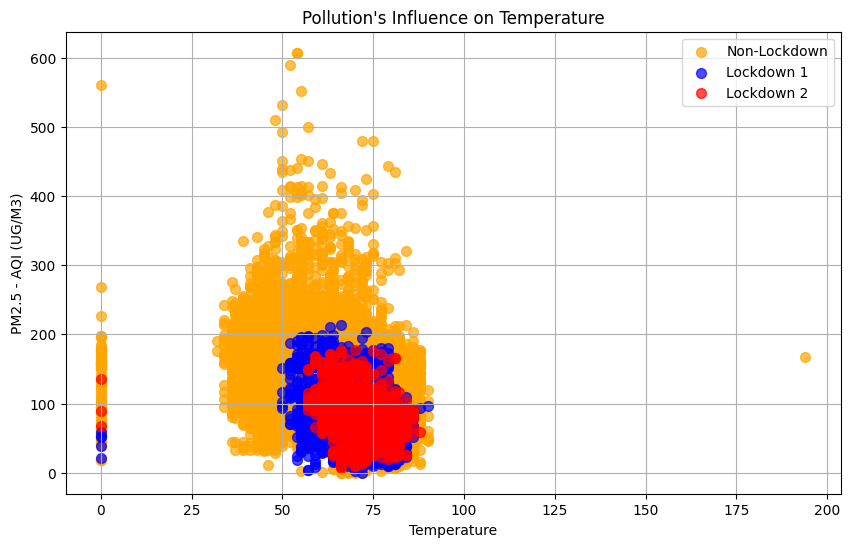

In [30]:
# Create scatter plot for pollution's influence on temperature
plt.figure(figsize=(10, 6))

# Scatter plot for non-lockdown period
plt.scatter(non_lockdown['Temperature'], non_lockdown['PM2.5 - AQI (UG/M3)'], color='orange', label='Non-Lockdown', alpha=0.7, s=50)

# Scatter plot for lockdown 1
plt.scatter(lockdown_1['Temperature'], lockdown_1['PM2.5 - AQI (UG/M3)'], color='blue', label='Lockdown 1', alpha=0.7, s=50)

# Scatter plot for lockdown 2
plt.scatter(lockdown_2['Temperature'], lockdown_2['PM2.5 - AQI (UG/M3)'], color='red', label='Lockdown 2', alpha=0.7, s=50)

plt.title("Pollution's Influence on Temperature")
plt.xlabel('Temperature')
plt.ylabel('PM2.5 - AQI (UG/M3)')
plt.legend()
plt.grid(True)
plt.show()


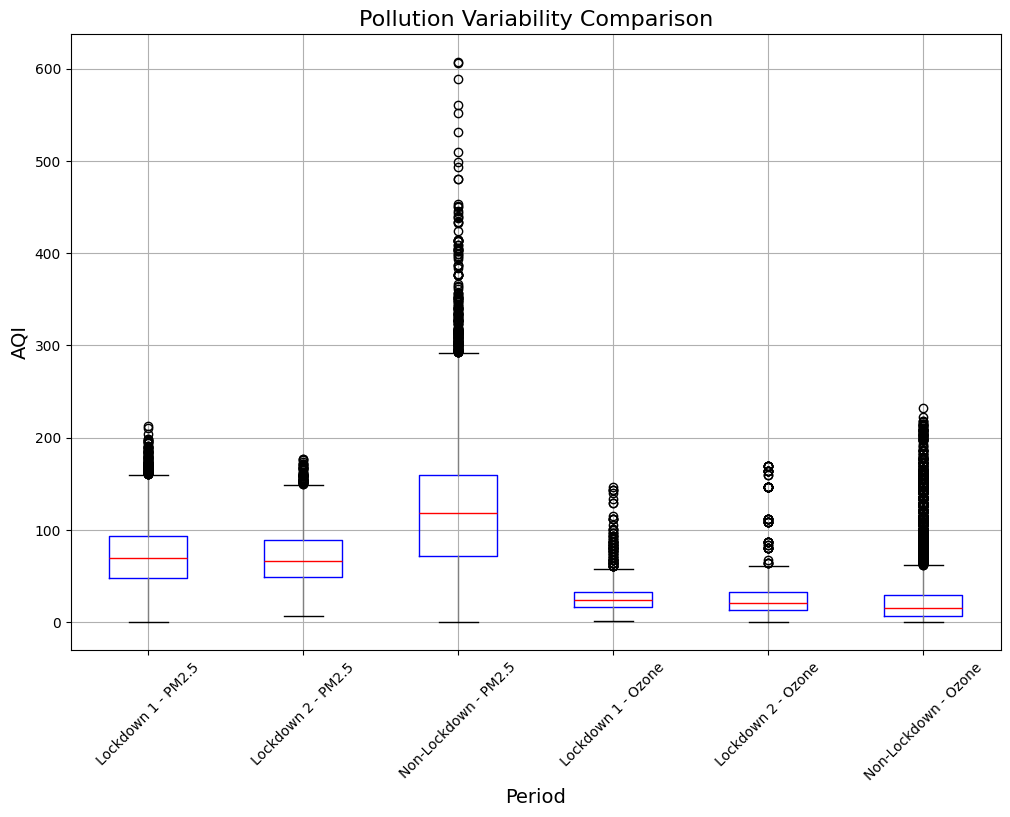

In [31]:
# Create box plot for pollution variability during lockdown and non-lockdown periods
plt.figure(figsize=(12, 8))

data = [lockdown_1['PM2.5 - AQI (UG/M3)'], lockdown_2['PM2.5 - AQI (UG/M3)'], non_lockdown['PM2.5 - AQI (UG/M3)'],
        lockdown_1['Ozone - AQI (PPB)'], lockdown_2['Ozone - AQI (PPB)'], non_lockdown['Ozone - AQI (PPB)']]

labels = ['Lockdown 1 - PM2.5', 'Lockdown 2 - PM2.5', 'Non-Lockdown - PM2.5', 
          'Lockdown 1 - Ozone', 'Lockdown 2 - Ozone', 'Non-Lockdown - Ozone']

boxprops = dict(color='blue')  # Box color
whiskerprops = dict(color='gray')  # Whisker color
medianprops = dict(color='red')  # Median line color

plt.boxplot(data, labels=labels, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)

plt.title('Pollution Variability Comparison', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better visualization

plt.show()

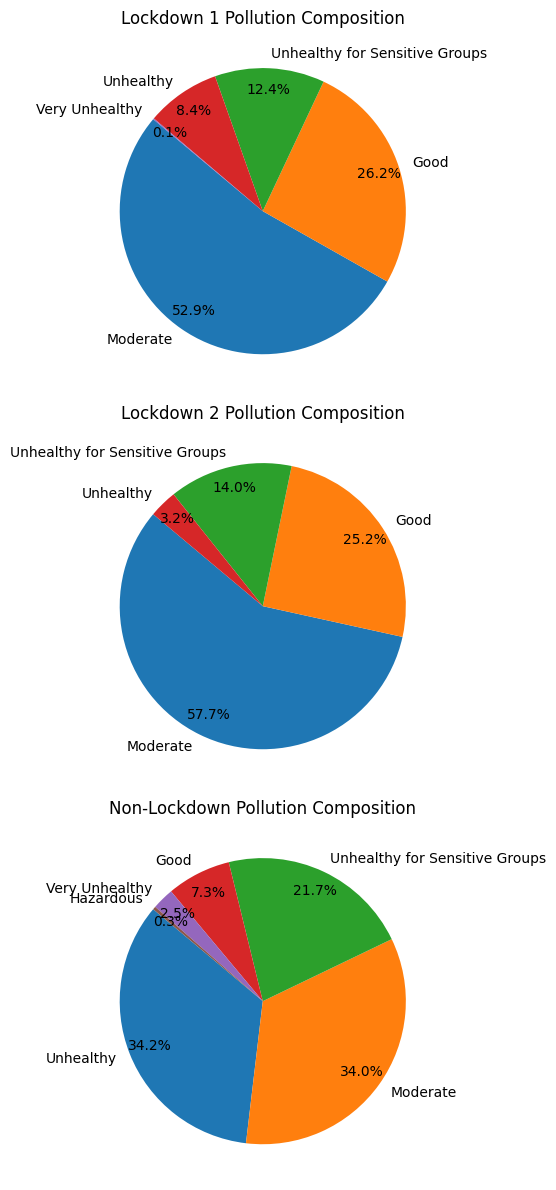

In [32]:
# Calculate the total pollution composition for lockdown 1
lockdown_1_composition = lockdown_1['PM2.5 AQI Category'].value_counts()

# Calculate the total pollution composition for lockdown 2
lockdown_2_composition = lockdown_2['PM2.5 AQI Category'].value_counts()

# Calculate the total pollution composition for non-lockdown period
non_lockdown_composition = non_lockdown['PM2.5 AQI Category'].value_counts()

plt.figure(figsize=(12, 12))

# Create pie chart for pollution composition during lockdown 1
plt.subplot(3, 1, 1)
plt.pie(lockdown_1_composition, labels=lockdown_1_composition.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.tab10.colors)
plt.title('Lockdown 1 Pollution Composition')

# Create pie chart for pollution composition during lockdown 2
plt.subplot(3, 1, 2)
plt.pie(lockdown_2_composition, labels=lockdown_2_composition.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.tab10.colors)
plt.title('Lockdown 2 Pollution Composition')


# Create pie chart for pollution composition during non-lockdown period
plt.subplot(3, 1, 3)
plt.pie(non_lockdown_composition, labels=non_lockdown_composition.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.tab10.colors)
plt.title('Non-Lockdown Pollution Composition')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

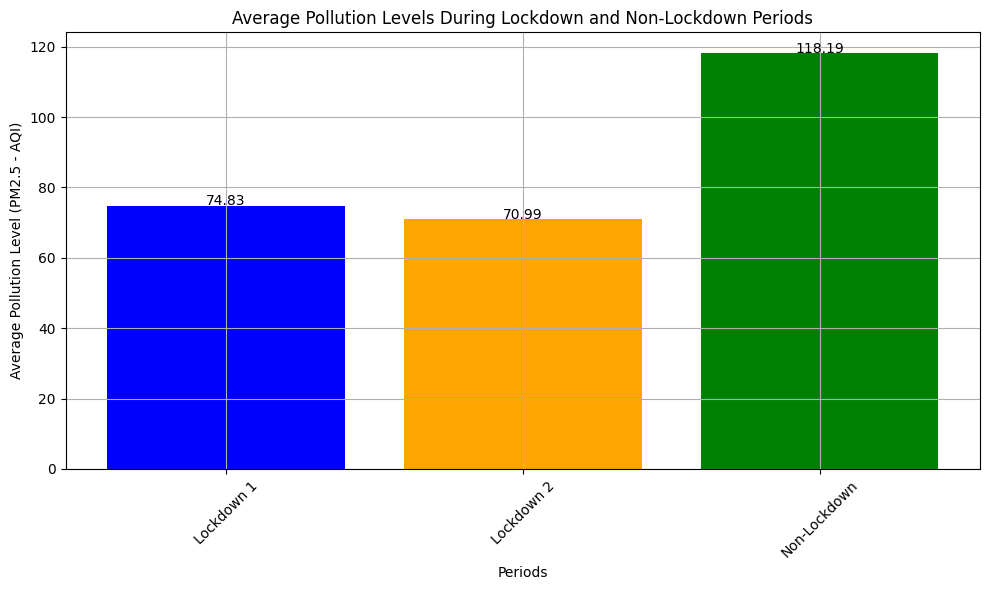

In [43]:
# Calculate average pollution levels during lockdown and non-lockdown periods
lockdown_1_avg_pollution = lockdown_1['PM2.5 - AQI (UG/M3)'].mean()
lockdown_2_avg_pollution = lockdown_2['PM2.5 - AQI (UG/M3)'].mean()
non_lockdown_avg_pollution = non_lockdown['PM2.5 - AQI (UG/M3)'].mean()

# Create bar chart for average pollution levels
plt.figure(figsize=(10, 6))
periods = ['Lockdown 1', 'Lockdown 2', 'Non-Lockdown']
pollution_levels = [lockdown_1_avg_pollution, lockdown_2_avg_pollution, non_lockdown_avg_pollution]
colors = ['blue', 'orange', 'green']

plt.bar(periods, pollution_levels, color=colors)
plt.title('Average Pollution Levels During Lockdown and Non-Lockdown Periods')
plt.xlabel('Periods')
plt.ylabel('Average Pollution Level (PM2.5 - AQI)')
plt.grid(True)  # Adding grid lines

# Adding data labels
for i in range(len(periods)):
    plt.text(i, pollution_levels[i] + 0.1, f'{pollution_levels[i]:.2f}', ha='center')

# Rotating x-axis labels
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()